# March 2022 Gov Emply Data Exploring Variable Relationships

## 1. Import Libraries and Data
## 2. Create Subset of Data for Visual Analysis
## 3. Correlation Heatmap
## 4. Scatterplot Analysis
## 5. Pair Plot Analysis
## 6. Categorical Plot
## 7. Revisit initial questions
## 8. Hypotheses

### 1. Import Libraries and Data

In [1]:
# Import Visualization Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
matplotlib.__version__

'3.5.1'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define path

path = r'/Users/bethanybreed/Documents/A Career Foundry/Gov Employ Data/02 Data'

In [6]:
# Import Data

df = pd.read_pickle(os.path.join(path,'prepared data','March 2022 clean-a.pkl'))

In [7]:
#Check Data import and have info easily accessible for graphs

In [8]:
df.shape

(2152679, 19)

In [9]:
df.columns

Index(['sub_agency', 'country', 'age_level', 'education_level', 'pay_grade',
       'years_grouping', 'occupation', 'occupation_category', 'pay_plan',
       'stem', 'supervisor_status', 'full_time', 'work_status', 'date',
       'salary', 'years_of_service', 'occupation_family', 'agency', 'state'],
      dtype='object')

In [10]:
df.dtypes

sub_agency              object
country                 object
age_level               object
education_level         object
pay_grade              float64
years_grouping          object
occupation              object
occupation_category     object
pay_plan                object
stem                    object
supervisor_status       object
full_time               object
work_status             object
date                    object
salary                 float64
years_of_service       float64
occupation_family       object
agency                  object
state                   object
dtype: object

In [11]:
df.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,supervisor_status,full_time,work_status,date,salary,years_of_service,occupation_family,agency,state
0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,BACHELORS,NaN,15 - 19,PROGRAM MANAGEMENT,Administrative,ES-SENIOR EXECUTIVE SERVICE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,192500.0,18.8,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
1,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,55-59,POST-BACHELORS,NaN,25 - 29,GENERAL ATTORNEY,Professional,ES-SENIOR EXECUTIVE SERVICE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,187000.0,29.2,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
2,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,161786.0,12.5,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,OKLAHOMA
3,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,UNSPECIFIED,Full time,Non-Seasonal Full Time Permanent,March 2022,158383.0,10.5,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
4,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,POST-BACHELORS,13.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,UNSPECIFIED,Full time,Non-Seasonal Full Time Permanent,March 2022,121065.0,13.4,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA


In [12]:
#I want stem to be integer for this visualization
df['stem'] = df['stem'].astype('float') 

In [13]:
df.dtypes

sub_agency              object
country                 object
age_level               object
education_level         object
pay_grade              float64
years_grouping          object
occupation              object
occupation_category     object
pay_plan                object
stem                   float64
supervisor_status       object
full_time               object
work_status             object
date                    object
salary                 float64
years_of_service       float64
occupation_family       object
agency                  object
state                   object
dtype: object

### 2. Create Subset of Data for Visual Analysis

In [14]:
#Create a subset of data including salary, years_of_service, years_grouping, stem, education_level, age_level, sate, country, grade, supervisor_status

In [15]:
sub = df[['salary', 'years_of_service', 'years_grouping', 'stem','education_level', 'age_level', 'pay_grade', 'supervisor_status']]

In [16]:
sub.head()

,salary,years_of_service,years_grouping,stem,education_level,age_level,pay_grade,supervisor_status
0,192500.0,18.8,15 - 19,0.0,BACHELORS,40-44,NaN,SUPERVISOR OR MANAGER
1,187000.0,29.2,25 - 29,0.0,POST-BACHELORS,55-59,NaN,SUPERVISOR OR MANAGER
2,161786.0,12.5,10 - 14,0.0,POST-BACHELORS,35-39,15.0,SUPERVISOR OR MANAGER
3,158383.0,10.5,10 - 14,0.0,POST-BACHELORS,35-39,15.0,UNSPECIFIED
4,121065.0,13.4,10 - 14,0.0,POST-BACHELORS,40-44,13.0,UNSPECIFIED


### 3. Correlation Heatmap

In [17]:
# Create a correlation matrix so I can see the table

sub.corr()

,salary,years_of_service,stem,pay_grade
salary,1.000000,0.312935,0.348696,0.882584
years_of_service,0.312935,1.000000,-0.018226,0.307121
stem,0.348696,-0.018226,1.000000,0.257384
pay_grade,0.882584,0.307121,0.257384,1.000000


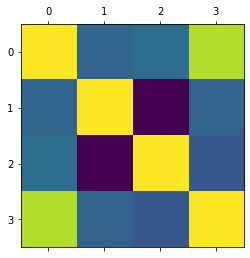

In [18]:
# Create a correlation heatmap using matplotlib with same data

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Government Employee Correlation Chart')

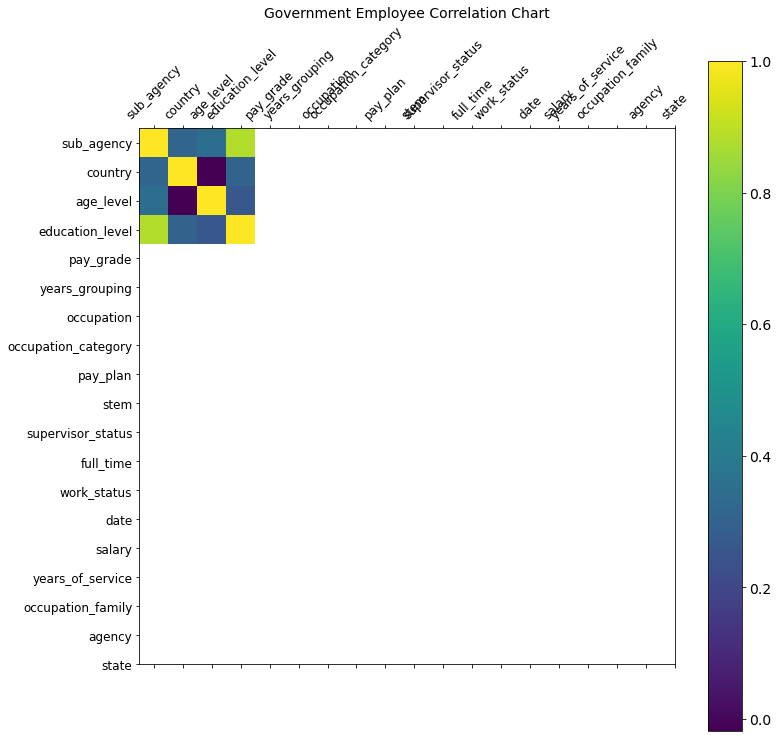

In [19]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Government Employee Correlation Chart', fontsize=14) # add title

In [20]:
#Create Sub2 of only the needed 4 variables for correlation chart

In [21]:
sub2 = df[['salary', 'years_of_service', 'stem', 'pay_grade']]

In [22]:
sub2.head()

,salary,years_of_service,stem,pay_grade
0,192500.0,18.8,0.0,NaN
1,187000.0,29.2,0.0,NaN
2,161786.0,12.5,0.0,15.0
3,158383.0,10.5,0.0,15.0
4,121065.0,13.4,0.0,13.0


Text(0.5, 1.0, 'Government Employee Data Correlation Heatmap')

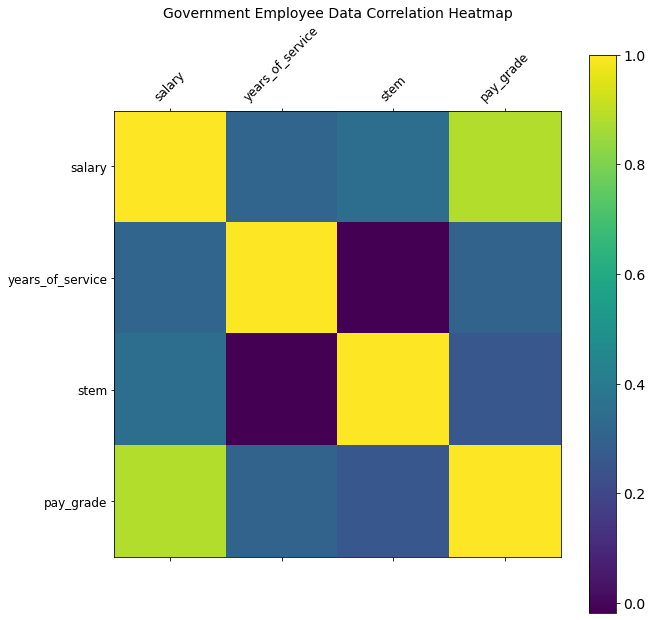

In [31]:
# Redo Heatmap with sub2 data

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(sub2.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub2.shape[1]), sub2.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(sub2.shape[1]), sub2.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Government Employee Data Correlation Heatmap', fontsize=14) # add title

### Correlation Graph Evaluation

The correlation Heatmap is mostly what I expected to see.  Stem (0/1 as true/false) does not correlate with years_of_service at all, which makes sense as working in stem doesn't increase your years and vice versa.  

I did hope to see more of a correlation between years of service and salary, as you would hope the longer you work the more you get paid.  

And I did hope to see more correlation between stem and salary as I would think stem jobs would be more technical and include more schoolwork and training, and therefore be higher pay.

As expected there is a clear correlation between pay grade (1-15 grades) and salary.  As your grade moves higher your salary does as well, but this confirms it. This does not necessarily mean that your high salary causes your high pay grade or vice versa, it just means that as one increases the other does as well

In [33]:
# For Practice I would like to create a correlation heatmap in seaborn as well

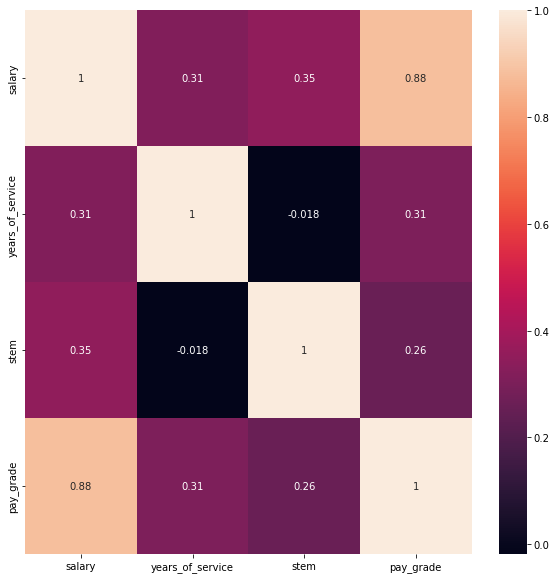

In [34]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub2.corr(), annot = True, ax = ax) 

### Evaluate Seaborn Heatmap

This is the same heatmap of course, but it does make it more clear to see how large or small the correlation is.  For example the correlation between stem and salary and years_of_service and salary are mid-range for correlation.  For a more clear correlation we would want it to be over .5 but you can see there is possible some correlation there. 

### 4. Scatterplot Analysis

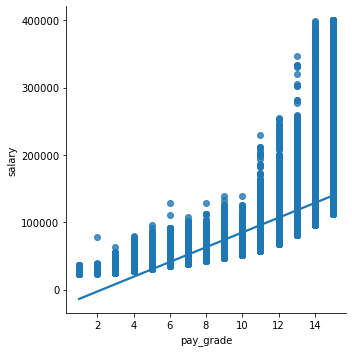

In [38]:
#The variables with the strongest correlations are paygrade & salary so I will create a scatterplot with those

sns.lmplot(x = 'pay_grade', y = 'salary', data = sub2)

In [39]:
#I want to do a scatterplot with years_of_service and salary as well.
# I know it isn't a strong correlation but just to see it as it is not categorical

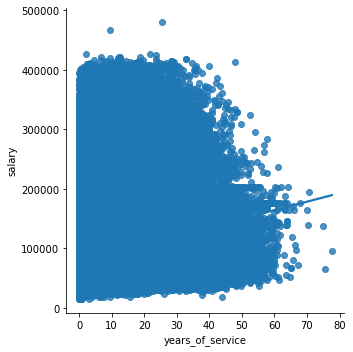

In [41]:
sns.lmplot(x = 'years_of_service', y = 'salary', data = sub2)

### Scatterplot Evaluation

As the pay_grade has only 15 options and is more categorical (compared to years_of_service). But the scatterplot still shows the correlation. It seems the lowest salary remains an option up til almost pay grade 8 and even then, the paygrade doesn't increase drastically. Pay grade 15 looks like it's lowest is 10,0000.  But on the top side you can see the clear difference, as the pay grade hits above 10 there is a drastic increase in salary.

I didn't expect to see much with years_of_service and salary, but wanted to do a scatterplot with a non-categorical option.  As you can see there are lots of dots all over showing there isn't much of a correlation and it is not strong.  You can also see a few outliers at the highest pay range and with the longest years of service.  As would be expect seeing as how most people would be 80/90 years old to serve 70-80 years, and you would expect only a few top employees to have the highest salary

### 5. Pair Plot Analysis

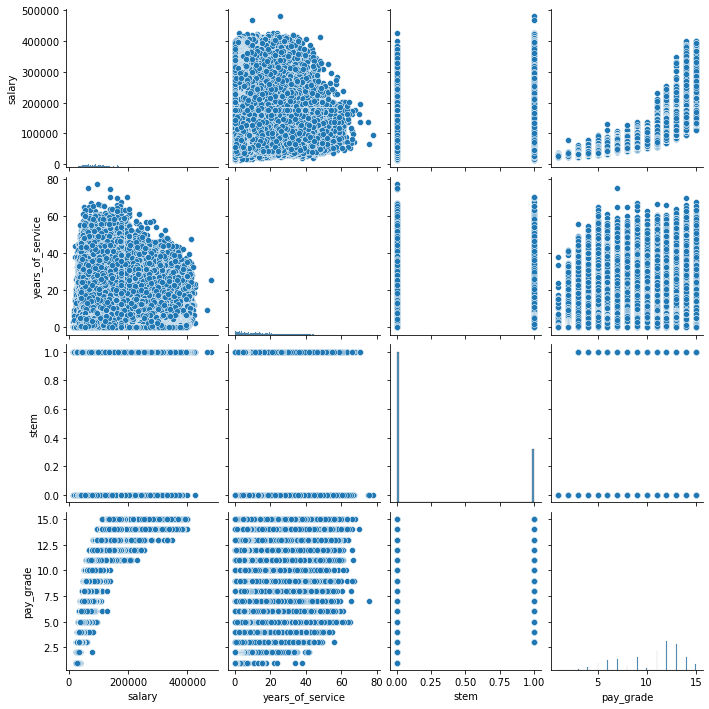

In [42]:
# Create a pair plot using sub2 as it has the 4 numeric variables to compare

g = sns.pairplot(sub2)

### Pair Plot Evaluation

We already evaluated 2/4 of these. But I will still review all 4.

The only possible correlation with STEM is pay grade showing that if you are a STEM occupation you won't have the lowest pay grade, but besides that you can have any other pay grade.

Years of Service also doesn't have much correlation as we saw with salary. With pay grade you can see that the lower pay grades only have those with less years of service only, but years of service for other pay grades are the full range.

We knew from the scatterplot that pay grade and salary have correlation. Higher salaries are only for higher pay grades, although there are still lower salaries in those pay grades as well.

### 6. Categorical Plot

In [44]:
# I have many categorical categories I wouldn't mind comparing to salary. 
# age_level, education_level, supervisor_status

In [46]:
# Data is very large so I'm going to create a subset and split 30% out

In [47]:
np.random.seed(4)
dev = np.random.rand(len(sub)) <= 0.7

In [48]:
big = sub[dev]

In [49]:
small = sub[~dev]

In [50]:
len(big) + len(small)

2152679

In [51]:
len(sub)

2152679

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '40-44'),
  Text(1, 0, '35-39'),
  Text(2, 0, '50-54'),
  Text(3, 0, '30-34'),
  Text(4, 0, '45-49'),
  Text(5, 0, '55-59'),
  Text(6, 0, '60-64'),
  Text(7, 0, '65 or more'),
  Text(8, 0, '25-29'),
  Text(9, 0, '20-24'),
  Text(10, 0, 'Less than 20')])

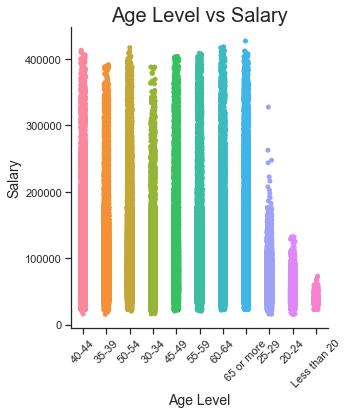

In [66]:
# Create a categorical plot in seaborn using the sub data with salary and age_level

sns.set(style="ticks")
g = sns.catplot(x="age_level", y="salary", hue="age_level", data=small)
plt.xlabel("Age Level", size=14)
plt.ylabel("Salary", size=14)
plt.title("Age Level vs Salary", size=20)
plt.xticks(rotation=45)

### Age Level vs Salary

This chart shows that those that are younger than 30 will make a lower salary.  It does not mean that just because you are older, you get a higher salary as you can see the older ages have colors on the entire spectrum of the salary.  But when you are younger it would be expected you know less and have less experience and therefore would make less.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'SUPERVISOR OR MANAGER'),
  Text(1, 0, 'UNSPECIFIED'),
  Text(2, 0, 'SUPERVISOR (CSRA)'),
  Text(3, 0, 'MANAGEMENT OFFICIAL (CSRA)'),
  Text(4, 0, 'TEAM LEADER'),
  Text(5, 0, 'LEADER')])

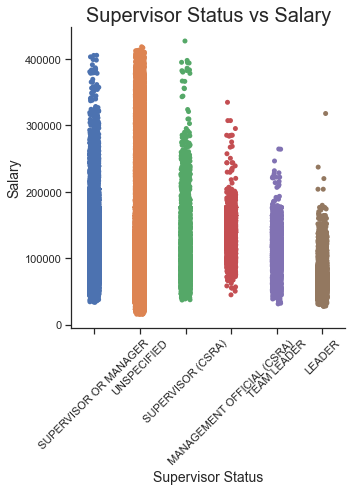

In [69]:
# Create a categorical plot in seaborn using the sub data with salary and supervisor_status

sns.set(style="ticks")
g = sns.catplot(x="supervisor_status", y="salary", hue="supervisor_status", data=small)
plt.xlabel("Supervisor Status", size=14)
plt.ylabel("Salary", size=14)
plt.title("Supervisor Status vs Salary", size=20)
plt.xticks(rotation=45)

### Supervisor Status vs Salary

I thought this would be interesting to compare to see if there was a specific category like "supervisor or manager" that definitely made above a certain pay range, but once again they are spread across the entire salary spectrum.  Orange is unspecified and those would be the "anything that doesn't fit in the other categories" and their pay range is all over, so you don't necessarily have to be a supervisor to make more money which is interesting.   

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'SUPERVISOR OR MANAGER'),
  Text(1, 0, 'UNSPECIFIED'),
  Text(2, 0, 'SUPERVISOR (CSRA)'),
  Text(3, 0, 'MANAGEMENT OFFICIAL (CSRA)'),
  Text(4, 0, 'TEAM LEADER'),
  Text(5, 0, 'LEADER')])

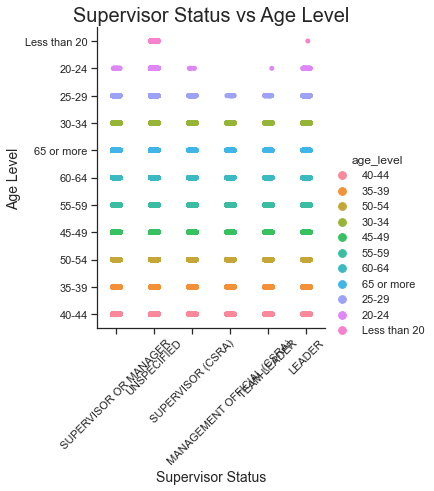

In [73]:
# Create a categorical plot in seaborn using the sub data with age level and supervisor_status

sns.set(style="ticks")
g = sns.catplot(x="supervisor_status", y="age_level", hue="age_level", data=small)
plt.xlabel("Supervisor Status", size=14)
plt.ylabel("Age Level", size=14)
plt.title("Supervisor Status vs Age Level", size=20)
plt.xticks(rotation=45)

### Supervisor Status vs Age level

I mostly wanted to see what 2 categories would do with this.  Although the labels on the bottom are squashed still, it shows that to be someone lower liek a leader or team leader you can be any age, but for a Supervisor you have to be at least 25.  Which once again is expected as you would want someone with experience before they are supervising others.  I might have thought it would be older.

### 7. Revisit initial questions

My initial questions mostly revolved around salary to see if there were any specific driving factors (age, education, years working that affect salary and would be a clear sign "to be paid more do this."  I believe I haven't found any super clear correlation for any of these, but there are some indications on the lower ends of if you want to be paid more at the beginning this is what you can do (work on becoming a supervisor, be older (which I equate with having more years of experience and maturity level).  Years of service doesn't seem to be correlated with salary either, it does have a small correlation but nothing was clear except pay grade which is expected as pay grade indicates the level 1-15 of your pay grade with 15 being higher.

### 8. Hypotheses

As most of my factors here don't seem to have a clear correlation I may rethink some of these, or try to look into them further with more narrowed categories.

I do want to look at salary across the states, and more specifically divide out brackets of jobs if possible to see if same jobs are paid the same across the states, but that would fall in the next lesson, so I didn't try to compare anything in this lesson.